In [ ]:
# https://data.opendatasoft.com/explore/dataset/georef-australia-state%40public/export/?disjunctive.ste_code&disjunctive.ste_name
# credits OpenDataSoft

In [83]:
import os
import json
import gc

import numpy as np
np.random.seed(2025 - 5 - 10)
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import cnames
import matplotlib.patches as patches

In [47]:
hordeum_australia = pd.read_csv(r"./data/hordeum-2025-05-07/hordeum-2025-05-07.csv", low_memory=False)
cyperus_australia = pd.read_csv(r"./data/cyperus-2025-05-07/cyperus-2025-05-07.csv", low_memory=False)
fred = pd.read_csv(r"./data/FRED/FRED3_Entire_Database_2021.csv", low_memory=False, header=0, skiprows=range(1, 10))

cyperus_nsw_pathways = pd.read_csv(r"./data/AVH/cyperus_nsw.csv").dropna() # records with unknown photosynthetic 
# pathways are practically useless to us!

# australia = pd.read_csv(r"./data/georef-australia-state@public.csv", low_memory=False, sep=';')
# with open(r"./data/georef-australia-state@public.json", mode='r') as fp:
#     ausgeo = json.load(fp=fp)

with open(file=r"./data/australia-borders-coordinates.npy", mode="rb") as fp:
    COORDINATES_AUSTRALIA = np.load(file=fp, allow_pickle=False)

with open(file=r"./data/nsw-borders-coordinates.npy", mode="rb") as fp:
    COORDINATES_NSW = np.load(file=fp, allow_pickle=False)   

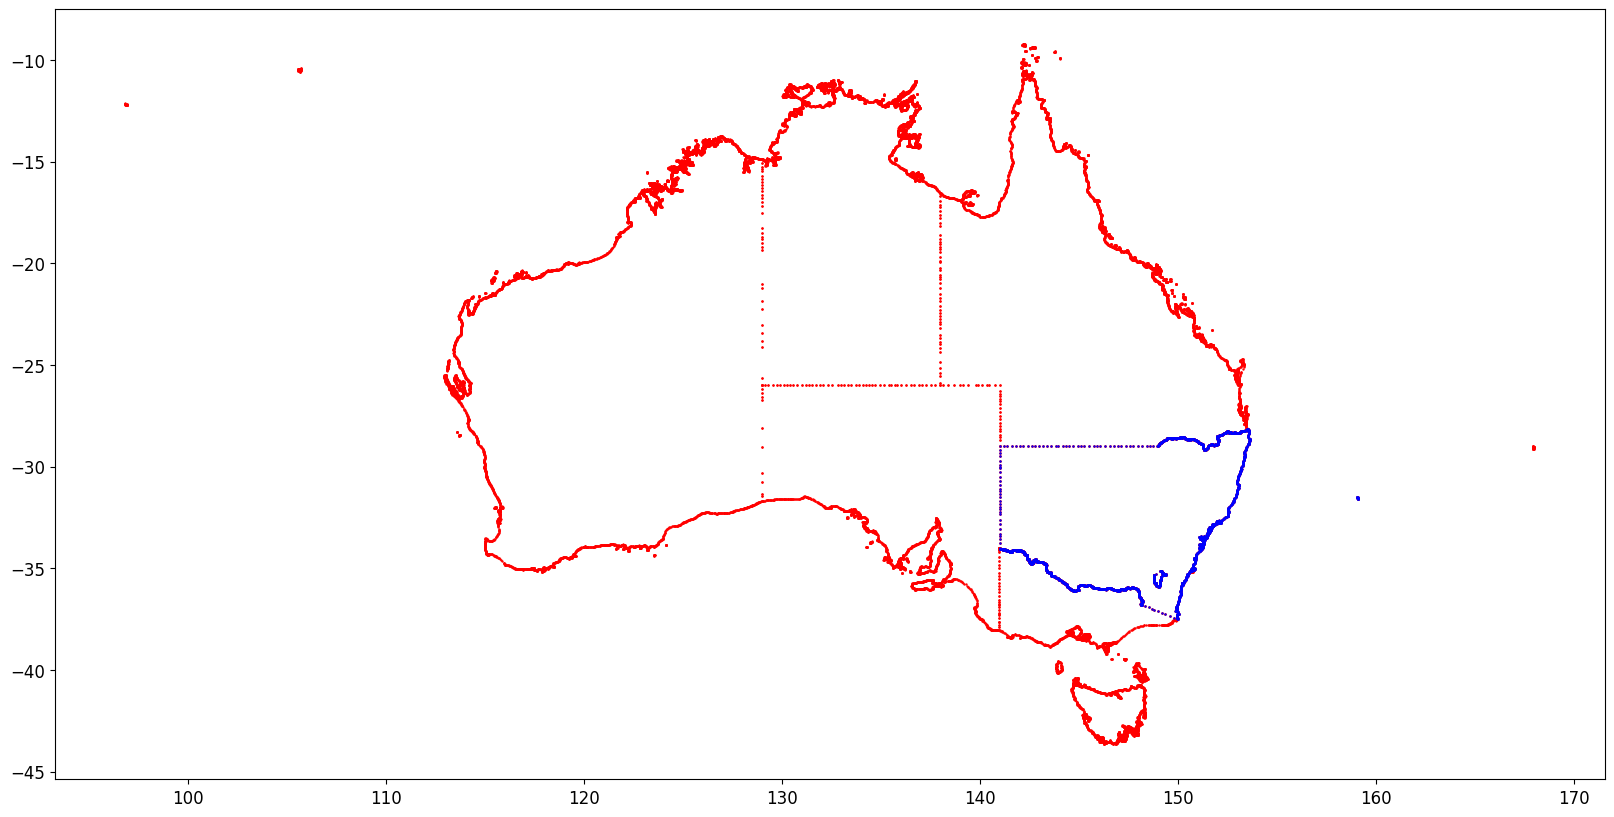

In [153]:
# that was so fucking FAST!!!

fig, axes = plt.subplots()
fig.set_size_inches(20 ,10)
axes.scatter(COORDINATES_AUSTRALIA[:, 0], COORDINATES_AUSTRALIA[:, 1], s=0.5, color="red")
axes.scatter(COORDINATES_NSW[:, 0], COORDINATES_NSW[:, 1], s=0.5, color="blue")
plt.show()

# ___Hordeum___
-------------------------

In [6]:
os.listdir(r"./data/hordeum-2025-05-07/")

['citation.csv',
 'doi.txt',
 'headings.csv',
 'hordeum-2025-05-07.csv',
 'README.html']

In [7]:
with pd.option_context("display.max_rows", None):
    # print(pd.read_csv(r"./data/hordeum-2025-05-07/headings.csv").loc[:, ["Column name", "Field description"]])
    pass

In [8]:
# life stage
# Family  
# Genus  
# Subgenus  
# Specific Epithet
# Latitude  
# Longitude  
# Datum

In [9]:
hordeum_australia.columns[hordeum_australia.columns.str.contains("itude")]

Index(['decimalLatitude', 'decimalLongitude', 'verbatimLatitude',
       'verbatimLongitude'],
      dtype='object')

In [10]:
# we don't want these
hordeum_australia.query("decimalLatitude>-10")

,dataResourceUid,images,dcterms:modified,dcterms:language,dcterms:license,rightsHolder,dcterms:accessRights,dcterms:bibliographicCitation,references,institutionID,...,source,measurementID,measurementType,measurementUnit,measurementDeterminedBy,measurementAccuracy,degreeOfEstablishment,relatedResourceID,images.1,dcterms:type
2119,dr26650,NaN,2017-05-16,en,CC-BY 4.0 (Int),NaN,NaN,NaN,http://www.aucklandmuseum.com/discover/collect...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PhysicalObject
2120,dr26650,NaN,2017-09-07,en,CC-BY 4.0 (Int),NaN,NaN,NaN,http://www.aucklandmuseum.com/discover/collect...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PhysicalObject


In [11]:
hordeum_tidied =  hordeum_australia.loc[:, ["country", "stateProvince", "day", "month", "year",
                         "genus", "specificEpithet", "decimalLatitude", "decimalLongitude"]].\
                            dropna(subset=["specificEpithet", "decimalLatitude", "decimalLongitude"]).\
                                query("decimalLatitude<-10 & specificEpithet!=\"sp.\"")

In [12]:
hordeum_tidied

,country,stateProvince,day,month,year,genus,specificEpithet,decimalLatitude,decimalLongitude
0,Australia,South Australia,16.0,12.0,1976.0,Hordeum,marinum,-35.050000,139.116667
1,Australia,Victoria,20.0,9.0,1978.0,Hordeum,glaucum,-35.850000,145.433333
2,Australia,Tasmania,NaN,6.0,1928.0,Hordeum,aegiceras,-42.883333,147.316667
3,Australia,Tasmania,1.0,12.0,1986.0,Hordeum,glaucum,-40.333333,148.066667
4,Australia,Tasmania,30.0,11.0,1986.0,Hordeum,glaucum,-40.316667,147.883333
...,...,...,...,...,...,...,...,...,...
2666,Australia,Victoria,1.0,11.0,2008.0,Hordeum,distichon,-37.316670,143.783330
2667,Australia,Victoria,22.0,11.0,1979.0,Hordeum,murinum,-36.933300,143.333300
2668,Australia,New South Wales,8.0,9.0,1931.0,Hordeum,glaucum,-33.216700,148.116700
2669,Australia,Victoria,1.0,9.0,2009.0,Hordeum,marinum,-36.495278,145.087500


In [13]:
# australia.loc[:, "Iso 3166-2 Feature Code"]

In [15]:
# [(_.get("ste_iso3166_code", None), _.get("ste_name", None)) for _ in ausgeo]

In [16]:
# ausgeo[4].get("ste_iso3166_code") #.get("geo_shape", "Oops!").get("geometry", "Welp!").keys()

In [18]:
hordeum_australia.stateProvince.isna().sum()

np.int64(11)

In [20]:
hordeum_colour_lookup = {
    "marinum": "blue",
     "glaucum": "red",
     "aegiceras": "green",
     "hystrix": "orange",
     "murinum": "violet",
     "leporinum": "brown",
     "distichon": "darkcyan",
     "vulgare": "yellow",
     "jubatum": "lightseagreen",
     "bulbosum": "cornflowerblue",
     "pusillum": "grey",
     "stenostachys": "crimson",
     "secalinum": "papayawhip",
     "nodosum": "mediumaquamarine",
     "chilense": "plum",
     "geniculatum": "purple"
}

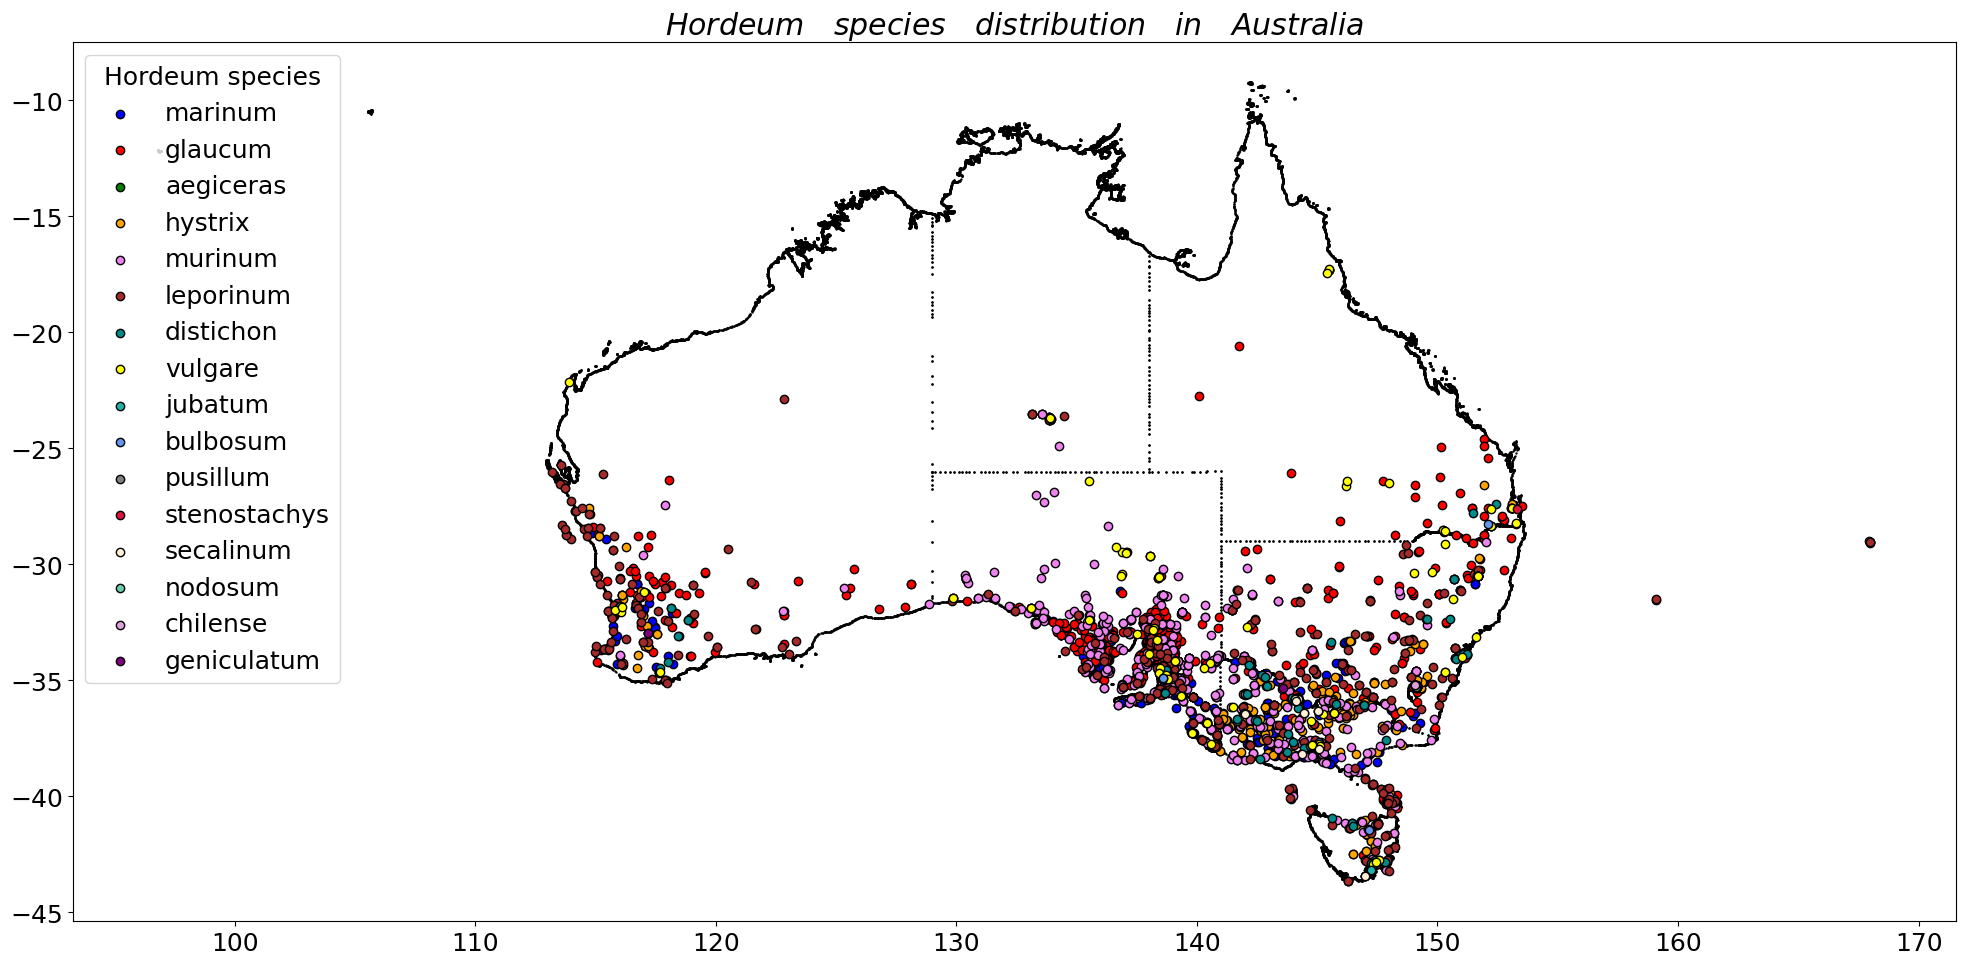

In [21]:
# DONE :)
plt.rcParams["font.size"] = 18
fig, axes = plt.subplots()
fig.set_size_inches(20, 10)
# draw the country, state and territory borders 

# for state_or_territory in ausgeo:
#     for coordinate_group in state_or_territory.get("geo_shape").get("geometry").get("coordinates"):
#         for coordinate in coordinate_group:
#             try:
#                 for (x, y) in coordinate:
#                     axes.plot(x, y, marker='o', color="black", markersize=0.5)
#             except TypeError:
#                 axes.plot(coordinate[0], coordinate[1], marker='o', color="black", markersize=0.5)

axes.scatter(COORDINATES_AUSTRALIA[:, 0], COORDINATES_AUSTRALIA[:, 1], s=0.5, color="black")

# plot the species                 
for species in hordeum_tidied.specificEpithet.unique():
    axes.scatter(x=hordeum_tidied.query(f"specificEpithet==\"{species}\"").decimalLongitude,
                 y=hordeum_tidied.query(f"specificEpithet==\"{species}\"").decimalLatitude,
                 color=hordeum_colour_lookup.get(species), label=species, edgecolor="black")#, alpha=0.5)

axes.legend(loc="upper left", title="Hordeum species")
axes.set_title(r"$Hordeum\hspace{1}species\hspace{1}distribution\hspace{1}in\hspace{1}Australia$")
plt.tight_layout()
# plt.savefig(fname="./hordeum-australia.jpeg", dpi=350)
plt.show()

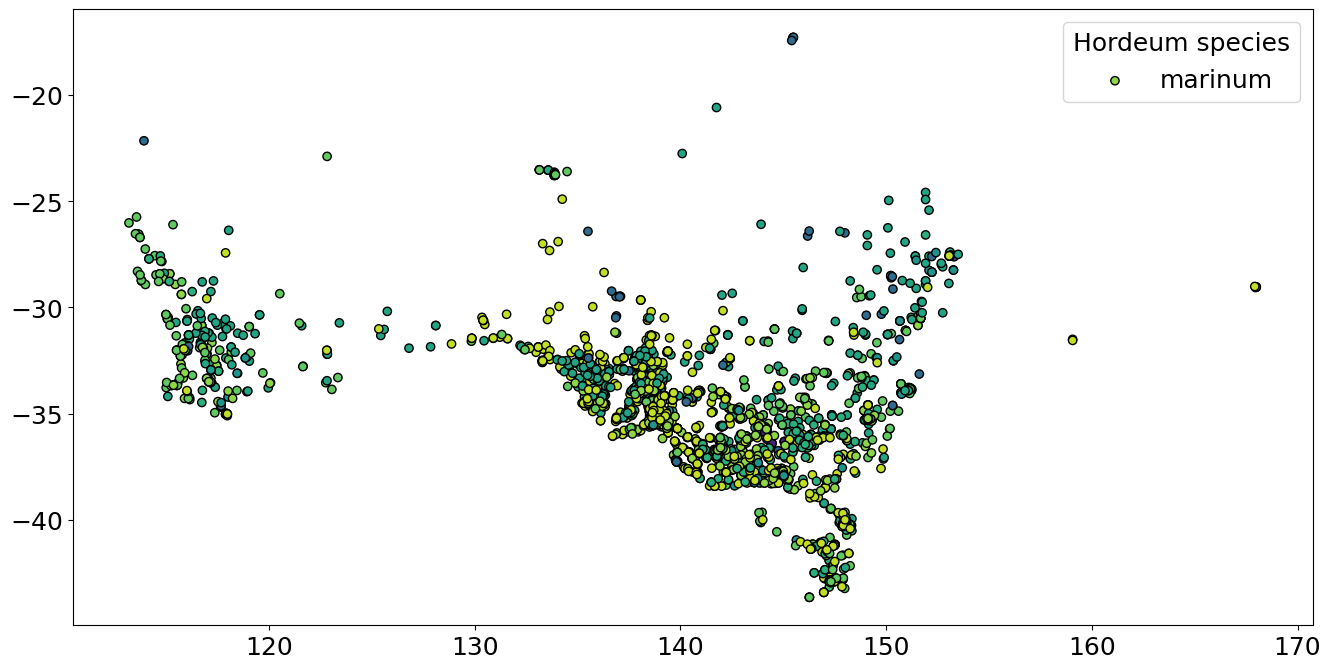

In [25]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 8)
scatter = axes.scatter(hordeum_tidied.decimalLongitude, hordeum_tidied.decimalLatitude,
             c=np.square(hordeum_tidied.specificEpithet.astype("category").cat.codes.values),
                      label=hordeum_tidied.specificEpithet, cmap="viridis", edgecolor="black")
axes.legend(labels=hordeum_tidied.specificEpithet.unique(), loc="upper right", title="Hordeum species")
plt.show()

In [26]:
hordeum_tidied_nsw =  hordeum_australia.loc[:, ["country", "stateProvince", "day", "month", "year",
                         "genus", "specificEpithet", "decimalLatitude", "decimalLongitude"]].\
                            dropna(subset=["specificEpithet", "decimalLatitude", "decimalLongitude"]).\
                                query("decimalLatitude<-10 & specificEpithet!=\"sp.\" & stateProvince==\"New South Wales\"")

In [27]:
hordeum_tidied_nsw

,country,stateProvince,day,month,year,genus,specificEpithet,decimalLatitude,decimalLongitude
140,Australia,New South Wales,1.0,10.0,1934.0,Hordeum,leporinum,-33.781667,151.167778
141,Australia,New South Wales,15.0,11.0,1991.0,Hordeum,leporinum,-33.828767,151.064067
142,Australia,New South Wales,21.0,2.0,1947.0,Hordeum,leporinum,-35.715000,147.301111
143,Australia,New South Wales,16.0,11.0,1952.0,Hordeum,leporinum,-35.165000,146.084444
144,Australia,New South Wales,3.0,10.0,2004.0,Hordeum,leporinum,-33.916667,151.233333
...,...,...,...,...,...,...,...,...,...
2540,Australia,New South Wales,NaN,NaN,1870.0,Hordeum,murinum,-32.600000,149.566700
2594,Australia,New South Wales,NaN,10.0,1930.0,Hordeum,hystrix,-35.216700,146.716700
2603,Australia,New South Wales,NaN,NaN,NaN,Hordeum,murinum,-29.050000,152.016700
2644,Australia,New South Wales,10.0,10.0,1949.0,Hordeum,hystrix,-35.833300,145.633300


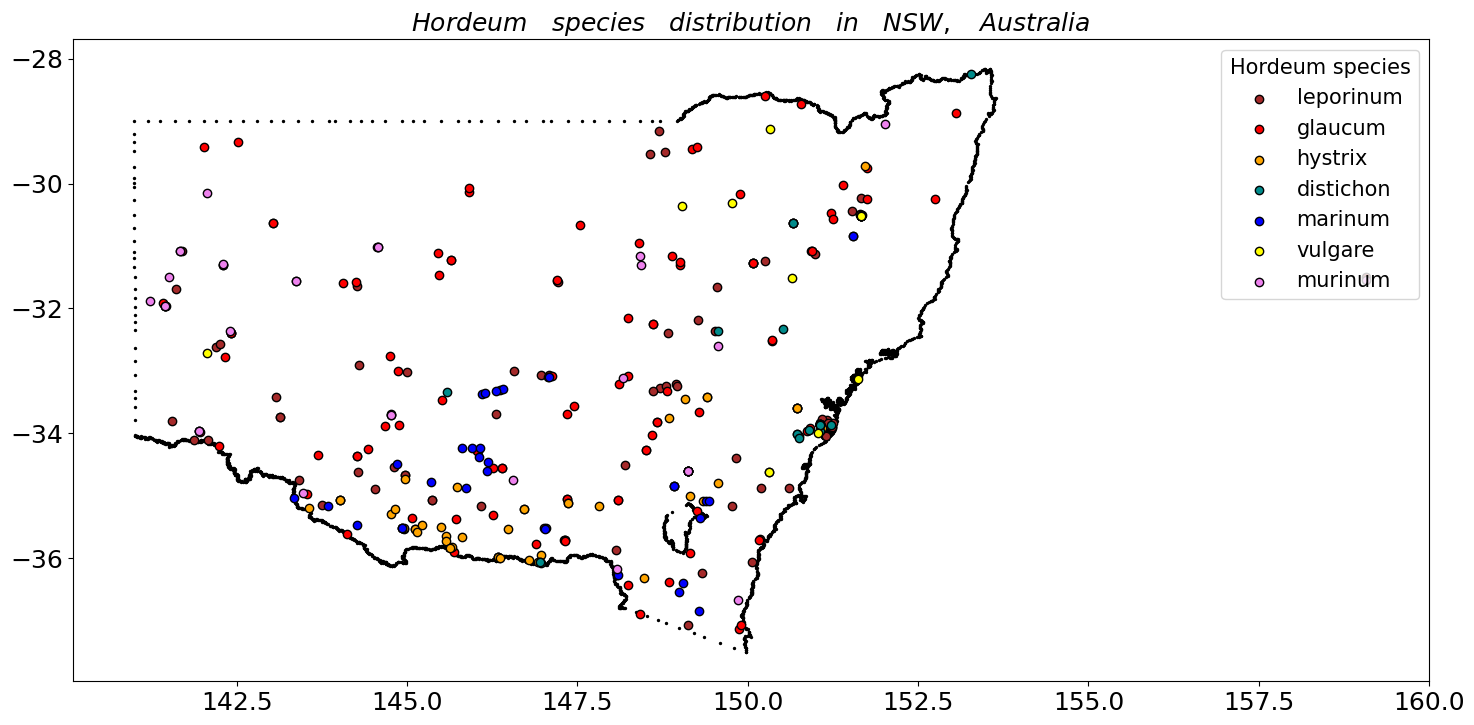

In [28]:
# JUST FOR NSW

fig, axes = plt.subplots()
fig.set_size_inches(15, 7.5)
plt.rcParams["font.size"] = 15
axes.set_title(r"$Hordeum\hspace{1}species\hspace{1}distribution\hspace{1}in\hspace{1}NSW,\hspace{1}Australia$")

# for coordinate_group in ausgeo[4].get("geo_shape").get("geometry").get("coordinates"):
#     for coordinate in coordinate_group:
#         try:
#             for (x, y) in coordinate:
#                 axes.plot(x, y, marker='o', color="black", markersize=2)
#         except TypeError:
#             axes.plot(coordinate[0], coordinate[1], marker='o', color="black", markersize=2)
axes.scatter(COORDINATES_NSW[:, 0], COORDINATES_NSW[:, 1], s=2, color="black")

# plot the species                 
for species in hordeum_tidied_nsw.specificEpithet.unique():
    axes.scatter(x=hordeum_tidied_nsw.query(f"specificEpithet==\"{species}\"").decimalLongitude,
                 y=hordeum_tidied_nsw.query(f"specificEpithet==\"{species}\"").decimalLatitude,
                 color=hordeum_colour_lookup.get(species), label=species, edgecolor="black")#, alpha=0.5)
axes.legend(loc="upper right", title="Hordeum species")

plt.tight_layout()
# plt.savefig(fname="./hordeum-nsw.jpeg", dpi=350)
plt.show()

In [34]:
[gc.collect(_) for _ in range(3)]

[0, 0, 0]

# ___Cyperus___
------------------------

In [4]:
cyperus_nsw = cyperus_australia.loc[:, ["country", "stateProvince", "year", "specificEpithet", "decimalLatitude", "decimalLongitude"]].\
                            dropna(subset=["specificEpithet", "decimalLatitude", "decimalLongitude"]).\
                                query("stateProvince==\"New South Wales\" & not specificEpithet.str.contains(\"sp.\")")

# we don't want the garbage with sp. postfixes

In [5]:
cyperus_nsw.isna().sum() # cool

country               0
stateProvince         0
year                152
specificEpithet       0
decimalLatitude       0
decimalLongitude      0
dtype: int64

In [6]:
sorted(cyperus_nsw.specificEpithet.unique());

In [7]:
NSW_CYPERUS_SPECIES_PHOTOSYNTHETIC_PATHWAY_LOOKUP_TABLE = {taxon.split(' ')[1].strip(): pathway \
        for (taxon, pathway) in zip(cyperus_nsw_pathways.taxon_name, 
                                    cyperus_nsw_pathways.photosynthetic_pathway)}

In [10]:
# completely based on 
# Bruhl, J. and Wilson, K. (2007) ‘Towards a Comprehensive Survey of C3 and C4 Photosynthetic Pathways in Cyperaceae’, Aliso, 23(1), pp. 99–148.
# Available at: https://doi.org/10.5642/aliso.20072301.11.

NSW_CYPERUS_SPECIES_PHOTOSYNTHETIC_PATHWAY_LOOKUP_TABLE

{'aggregatus': 'C4',
 'albostriatus': 'C3',
 'alopecuroides': 'C4',
 'alterniflorus': 'C4',
 'aquatilis': 'C3',
 'betchei': 'C4',
 'bifax': 'C4',
 'bowmanni': 'C4',
 'carinatus': 'C4',
 'castaneus': 'C4',
 'clarus': 'C4',
 'compressus': 'C4',
 'concinnus': 'C3',
 'congestus': 'C4',
 'conicus': 'C4',
 'cyperoides': 'C4',
 'dactylotes': 'C4',
 'dietrichiae': 'C4',
 'difformis': 'C3',
 'digitatus': 'C4',
 'disjunctus': 'C3',
 'dubius': 'C4',
 'eragrostis': 'C3',
 'esculentus': 'C4',
 'exaltatus': 'C4',
 'flaccidus': 'C3',
 'fulvus': 'C4',
 'gilesii': 'C4',
 'gracilis': 'C3',
 'gunnii': 'C4',
 'gymnocaulos': 'C3',
 'hamulosus': 'C4',
 'haspan': 'C3',
 'involucratus': 'C3',
 'iria': 'C4',
 'isabellinus': 'C4',
 'laevigatus': 'C4',
 'laevis': 'C3',
 'leiocaulon': 'C4',
 'lhotskyanus': 'C4',
 'lucidus': 'C4',
 'nutans': 'C4',
 'odoratus': 'C4',
 'papyrus': 'C4',
 'pilosus': 'C4',
 'platystylis': 'C3',
 'procerus': 'C4',
 'prolifer': 'C3',
 'pulchellus': 'C4+',
 'pygmaeus': 'C4',
 'reflexus': 

In [11]:
# remove the species that we do not know the photosynthetic pathways for
cyperus_nsw = cyperus_nsw.loc[np.logical_not(cyperus_nsw.specificEpithet.apply(lambda _:\
            NSW_CYPERUS_SPECIES_PHOTOSYNTHETIC_PATHWAY_LOOKUP_TABLE.get(_, None)).isna()), :]

cyperus_nsw.insert(loc=cyperus_nsw.shape[1], column="photosyntheticPathway",
    value=cyperus_nsw.specificEpithet.apply(lambda _: NSW_CYPERUS_SPECIES_PHOTOSYNTHETIC_PATHWAY_LOOKUP_TABLE.get(_))
)

In [13]:
cyperus_nsw

,country,stateProvince,year,specificEpithet,decimalLatitude,decimalLongitude,photosyntheticPathway
11,Australia,New South Wales,1997.0,congestus,-34.020833,151.205556,C4
32,Australia,New South Wales,2010.0,rigidellus,-28.780278,150.725000,C4
48,Australia,New South Wales,1984.0,gunnii,-31.616667,147.183333,C4
57,Australia,New South Wales,1984.0,lhotskyanus,-32.500000,147.433333,C4
61,Australia,New South Wales,1984.0,rigidellus,-31.750000,147.133333,C4
...,...,...,...,...,...,...,...
38120,Australia,New South Wales,1869.0,lucidus,-29.416700,152.616700,C4
38135,Australia,New South Wales,1963.0,gunnii,-35.416700,149.266700,C4
38137,Australia,New South Wales,NaN,rotundus,-29.016700,151.716700,C4
38157,Australia,New South Wales,1900.0,congestus,-33.850000,151.266700,C4


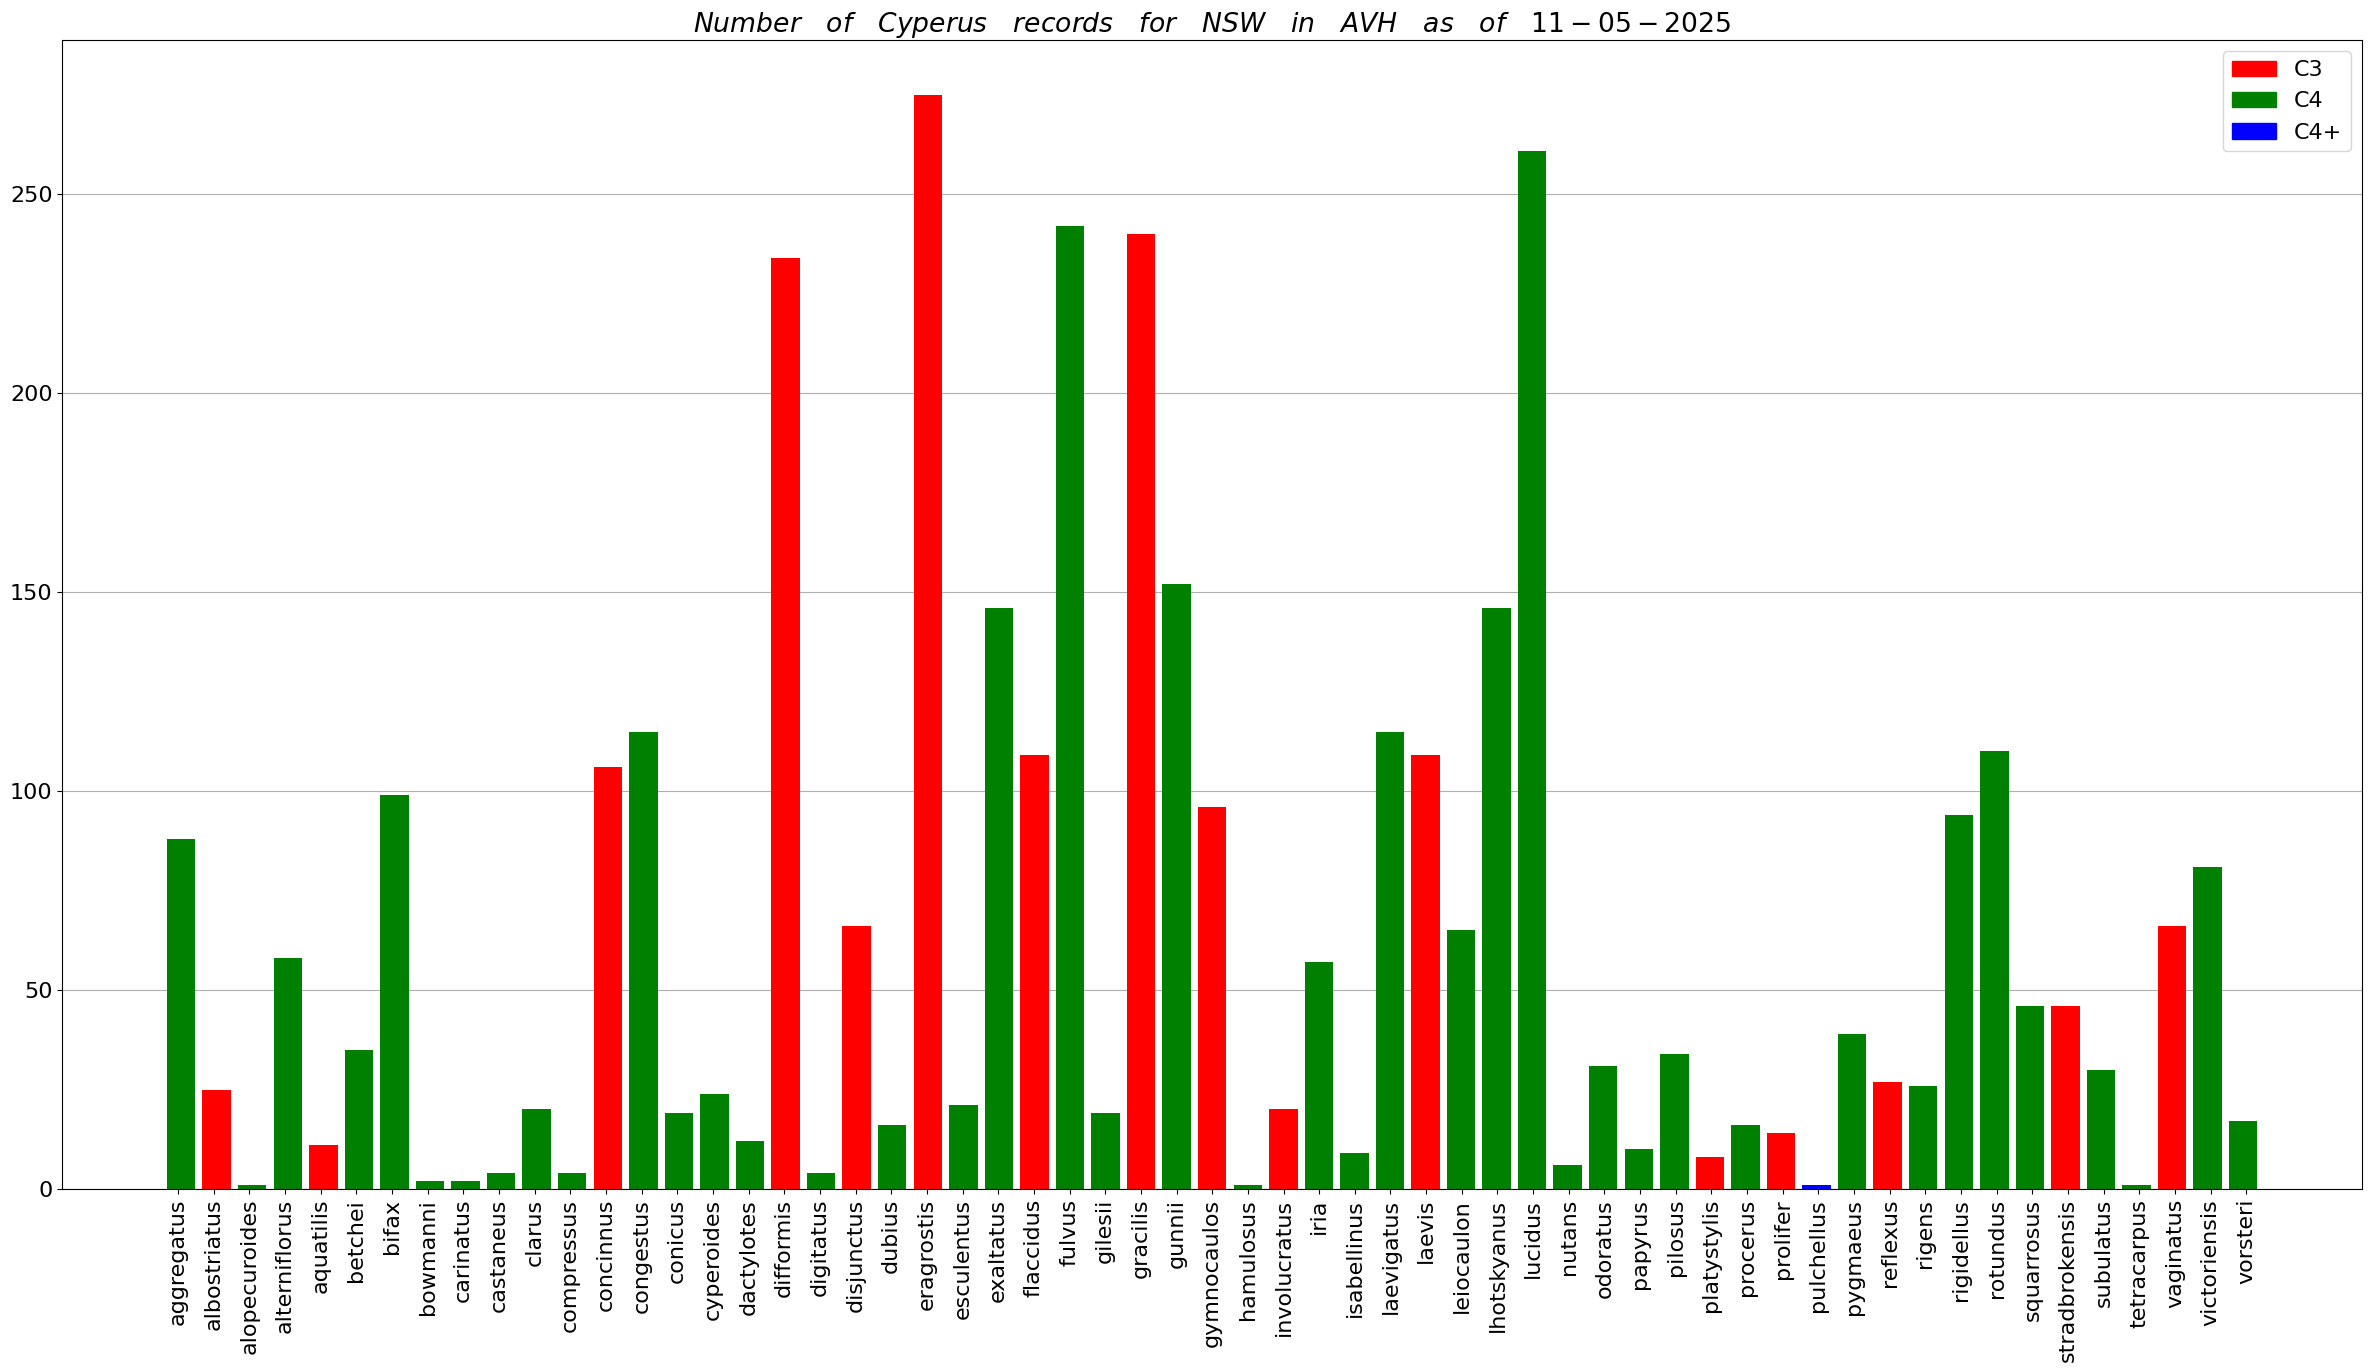

In [51]:
species, frequencies = np.unique(cyperus_nsw.specificEpithet, return_counts=True)
photosynthetic_pathway_colour_lookup = {"C3": "red", "C4": "green", "C4+": "blue"}

plt.rcParams["font.size"] = 16
fig, axes = plt.subplots()
fig.set_size_inches(24, 14)
axes.set_axisbelow(True)

axes.bar(x=species, height=frequencies,
         color=[photosynthetic_pathway_colour_lookup.get(NSW_CYPERUS_SPECIES_PHOTOSYNTHETIC_PATHWAY_LOOKUP_TABLE.get(_)) for _ in species],
        )
axes.grid(axis='y', which="both")
# axes.set_ylim(bottom=0, top=5)
x_min, x_max = axes.get_xlim()
axes.set_xticks(ticks=np.linspace(start=x_min+3.25, stop=x_max-3.25, num=species.size), labels=species, rotation=90)
axes.set_title(r"$Number\hspace{1}of\hspace{1}Cyperus\hspace{1}records\hspace{1}for\hspace{1}NSW\hspace{1}in\hspace{1}AVH\hspace{1}as\hspace{1}of\hspace{1}11-05-2025$")
axes.legend(handles=[patches.Patch(color=col, label=pathway) for (pathway, col) in photosynthetic_pathway_colour_lookup.items()], loc="upper right")
plt.tight_layout()
# plt.savefig(r"./avh-nsw-cyperus-frequencies.jpeg", dpi=500)
plt.show()

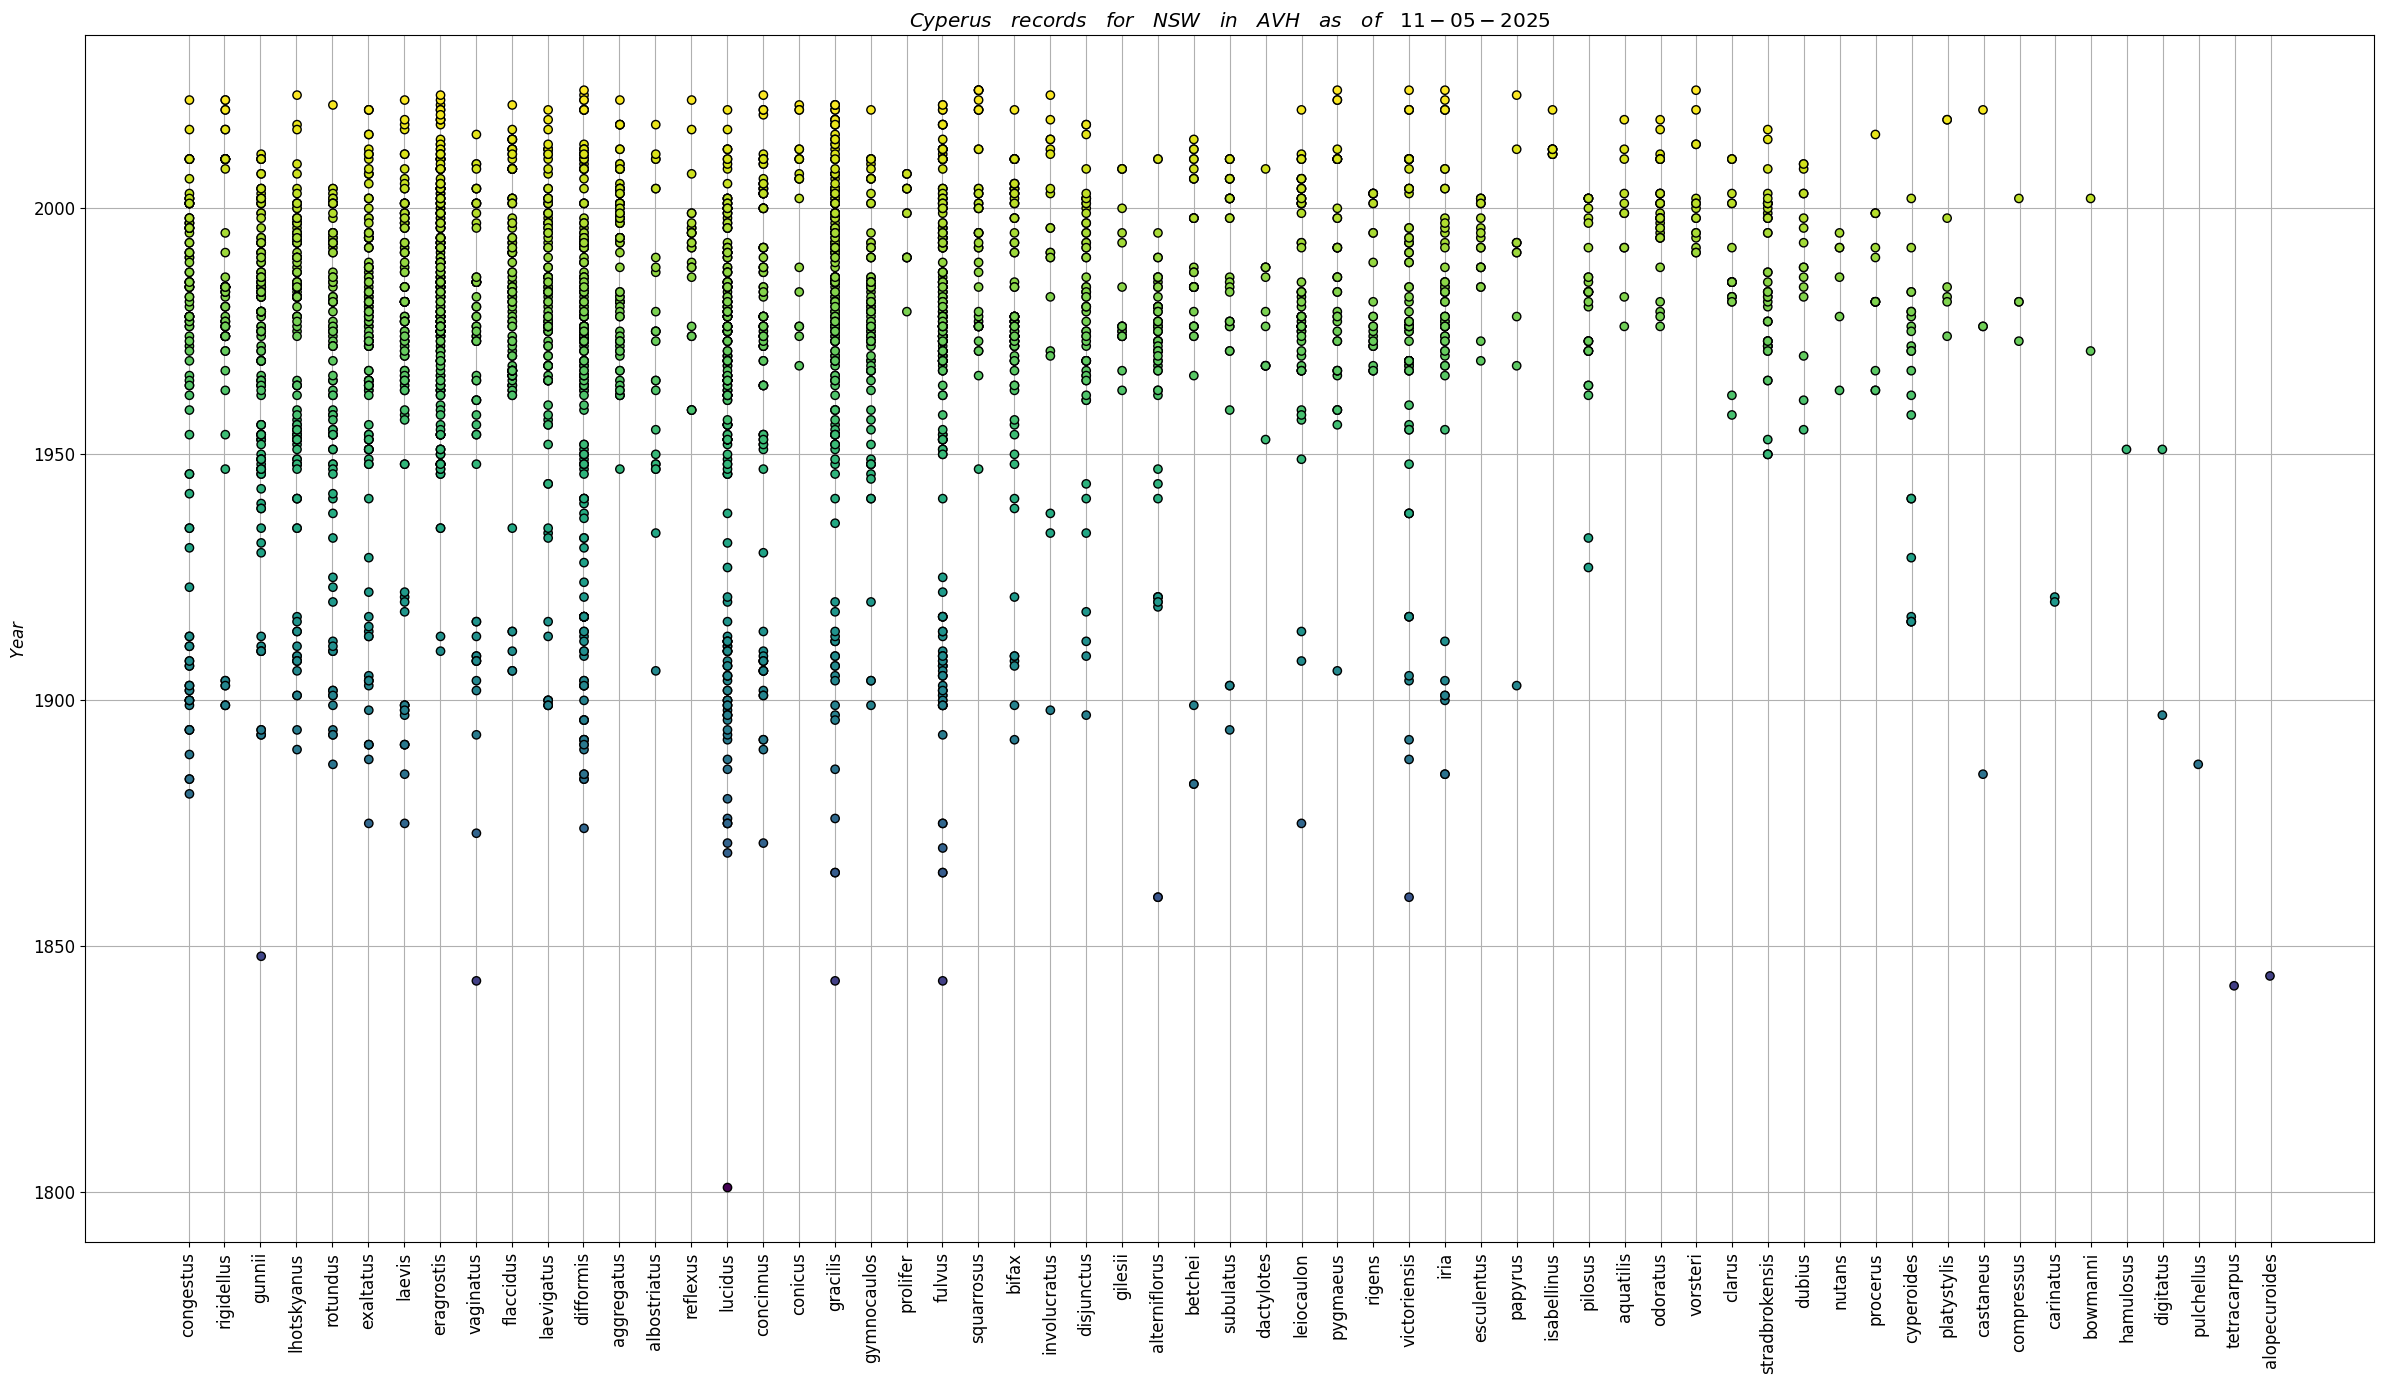

In [50]:
fig, axes = plt.subplots()
fig.set_size_inches(24, 14)
axes.set_axisbelow(True)
axes.scatter(cyperus_nsw.specificEpithet, cyperus_nsw.year, marker='o', edgecolor="black", c=cyperus_nsw.year)
axes.grid(axis="both", which="both")
x_min, x_max = axes.get_xlim()
axes.set_xticks(ticks=np.linspace(start=x_min+2.875, stop=x_max-2.875,
                    num=cyperus_nsw.specificEpithet.unique().size), labels=cyperus_nsw.specificEpithet.unique(), rotation=90)
axes.set_title(r"$Cyperus\hspace{1}records\hspace{1}for\hspace{1}NSW\hspace{1}in\hspace{1}AVH\hspace{1}as\hspace{1}of\hspace{1}11-05-2025$")
axes.set_ylabel(r"$Year$")
plt.tight_layout()
# plt.savefig(r"./avh-nsw-cyperus-years.jpeg", dpi=500)
plt.show()

In [41]:
cyperus_nsw.specificEpithet.unique().size

59

In [43]:
CYPERUS_SPECIES_COLOUR_LOOKUP = {species: colour for (species, colour) in \
                                 zip(cyperus_nsw.specificEpithet.unique(),
                                     np.random.choice(a=list(cnames.keys()), replace=False,
                            size=cyperus_nsw.specificEpithet.unique().size))}


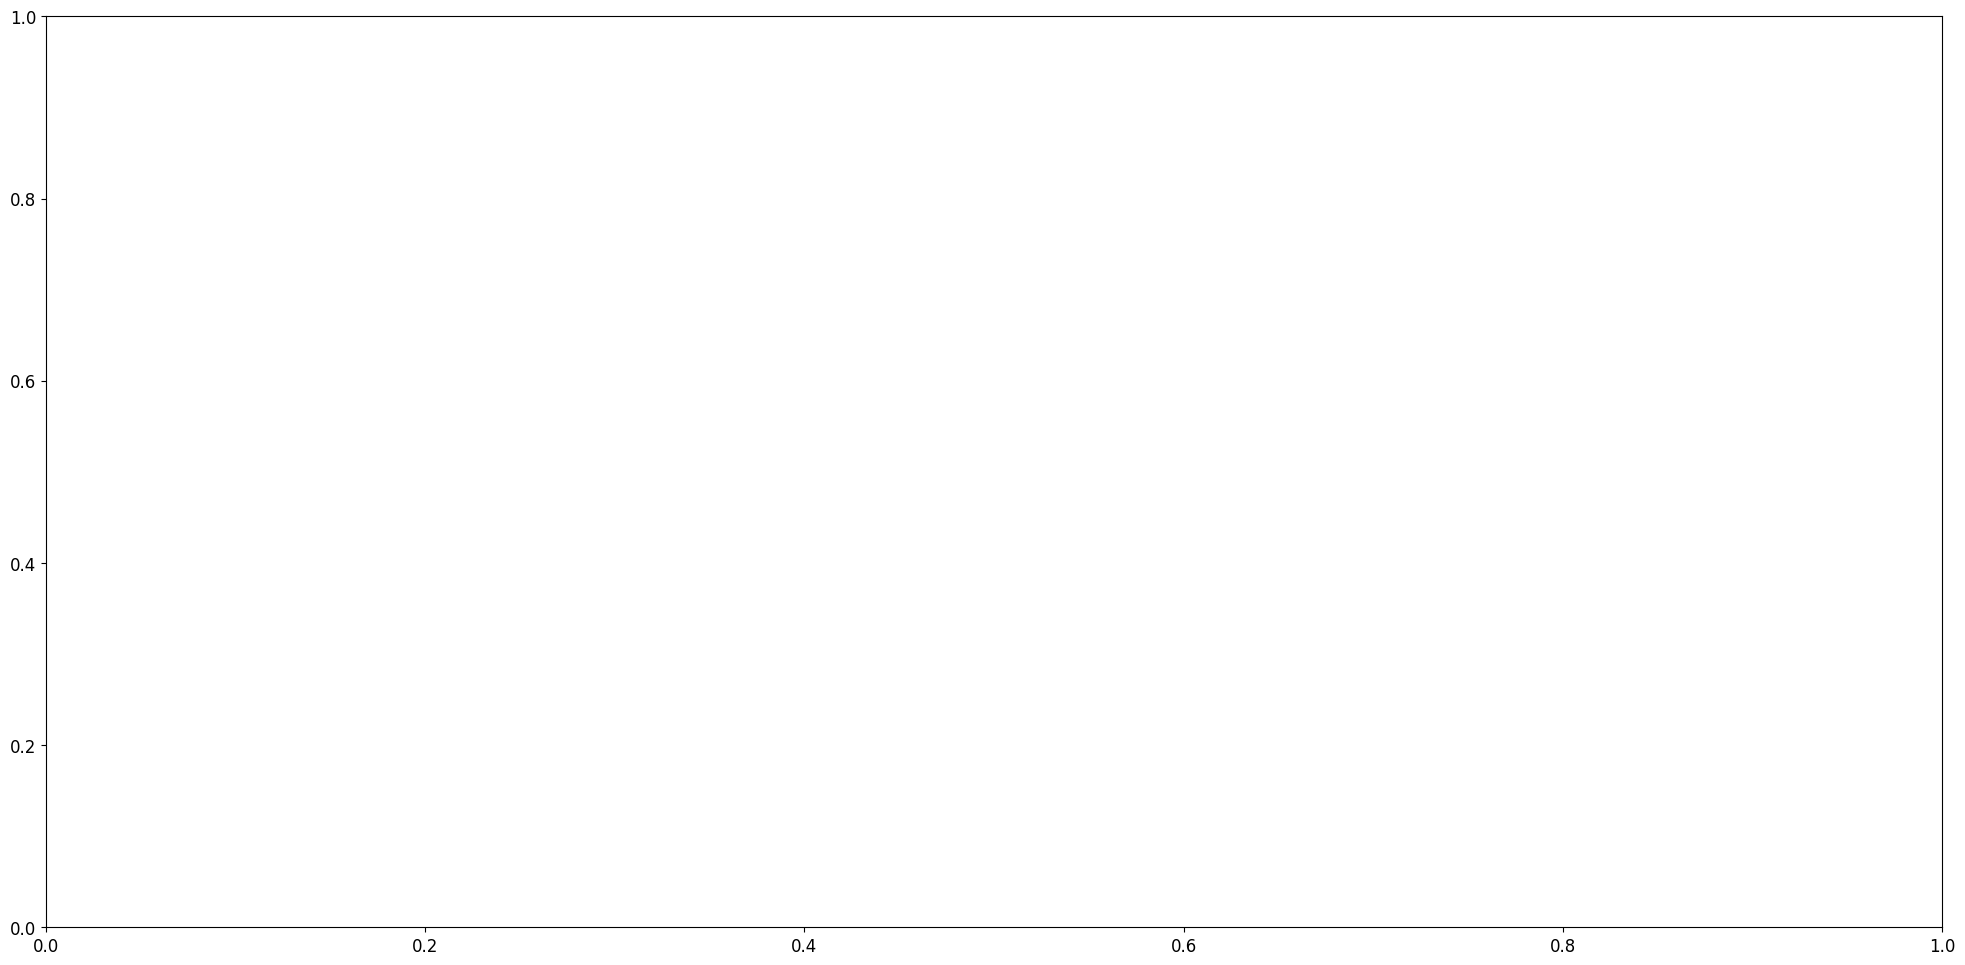

In [49]:
fig, axes = plt.subplots()
fig.set_size_inches(20, 10)
plt.rcParams["font.size"] = 12

for pathway in cyperus_nsw.photosyntheticPathway.unique(): # for each photosynthetic pathway
    # plot the borders
    axes.scatter(COORDINATES_NSW[:, 0], COORDINATES_NSW[:, 1], s=2, color="black")
    # for each species with the chosen pathway
    for species in cyperus_nsw.query(f"photosyntheticPathway==\"{pathway}\"").specificEpithet.unique():
        axes.scatter(
            x=cyperus_nsw.query(f"photosyntheticPathway==\"{pathway}\" & specificEpithet==\"{species}\"").decimalLongitude,
            y=cyperus_nsw.query(f"photosyntheticPathway==\"{pathway}\" & specificEpithet==\"{species}\"").decimalLatitude,
            label=species, edgecolor="black", color=CYPERUS_SPECIES_COLOUR_LOOKUP.get(species)
        )
    axes.set_title(f"${pathway}$" + r"$\hspace{1}Cyperus\hspace{1}species\hspace{1}distribution\hspace{1}in\hspace{1}NSW,\hspace{1}Australia$")
    axes.legend(ncols=3)
    plt.tight_layout()
    plt.savefig(fname=f"./cyperus-{pathway}-species-nsw.jpeg", dpi=500)
    axes.clear()
    
# plt.show()

In [165]:
for (_, df) in cyperus_nsw_pathways.groupby("photosynthetic_pathway"):
    print(df.sort_values("count", ascending=False))

                         taxon_name  count photosynthetic_pathway
30               Cyperus eragrostis    251                     C3
39                 Cyperus gracilis    241                     C3
24                Cyperus difformis    235                     C3
34                Cyperus flaccidus    113                     C3
53                   Cyperus laevis    109                     C3
17                Cyperus concinnus    108                     C3
42              Cyperus gymnocaulos     98                     C3
45     Cyperus haspan subsp. haspan     73                     C3
26               Cyperus disjunctus     68                     C3
91                Cyperus vaginatus     66                     C3
84           Cyperus stradbrokensis     46                     C3
70                 Cyperus reflexus     27                     C3
2              Cyperus albostriatus     25                     C3
48             Cyperus involucratus     20                     C3
67        

In [77]:
PHOTOSYNTHETIC_PATHWAY_MARKER_LOOKUP_TABLE = {
    "C3": 'o',
    "C4": '^', # traiangle
    "C4+": 's' # star
}

In [84]:
# NSW local government areas
# https://data.gov.au/data/dataset/nsw-local-government-areas
nsw_lga = gpd.read_file(r"./data/NSW-LGA/nsw_lga.shp")

In [98]:
nsw_lga

,LG_PLY_PID,LGA_PID,DT_CREATE,LGA_NAME,ABB_NAME,STATE,geometry
0,lgp8J8CkQMvWz-g,lgadf196edd3a41,2024-02-12,Albury City Council,Albury,NSW,"POLYGON ((146.81255 -36.0671, 146.81256 -36.06..."
1,lgpe47ce916e2c5,lga18e5bcb45b78,2021-08-11,Armidale Regional Council,Armidale Regional,NSW,"POLYGON ((152.36576 -30.70516, 152.36576 -30.7..."
2,lgpVISk01YTX3oa,lgacd5e92fad2d8,2024-02-12,Ballina Shire Council,Ballina,NSW,"POLYGON ((153.36249 -28.89178, 153.36252 -28.8..."
3,lgphe9Stn5s5nai,lgac11006b943bb,2023-11-12,Balranald Shire Council,Balranald,NSW,"POLYGON ((144.1561 -34.20819, 144.1561 -34.208..."
4,lgp4tBroTQsCZzo,lga098f9fe7f215,2025-02-12,Bathurst Regional Council,Bathurst Regional,NSW,"POLYGON ((149.11723 -33.88356, 149.11723 -33.8..."
...,...,...,...,...,...,...,...
193,lgpce84903875a5,lga0cd900c07cca,2021-08-11,Wollongong City Council,Wollongong,NSW,"POLYGON ((150.93647 -34.49425, 150.93647 -34.4..."
194,lgpe2683ee8a910,lga0cd900c07cca,2021-08-11,Wollongong City Council,Wollongong,NSW,"POLYGON ((150.92879 -34.45646, 150.92879 -34.4..."
195,lgpf001201df038,lga0cd900c07cca,2021-08-11,Wollongong City Council,Wollongong,NSW,"POLYGON ((150.92662 -34.49192, 150.92662 -34.4..."
196,lgp7zWv-hXmSwn7,lga0f45891fa7ad,2024-11-12,Woollahra Municipal Council,Woollahra,NSW,"POLYGON ((151.23062 -33.88732, 151.23062 -33.8..."


In [92]:
nsw_lga.columns

Index(['LG_PLY_PID', 'LGA_PID', 'DT_CREATE', 'LGA_NAME', 'ABB_NAME', 'STATE',
       'geometry'],
      dtype='object')

In [96]:
nsw_lga.ABB_NAME

0                 Albury
1      Armidale Regional
2                Ballina
3              Balranald
4      Bathurst Regional
             ...        
193           Wollongong
194           Wollongong
195           Wollongong
196            Woollahra
197          Yass Valley
Name: ABB_NAME, Length: 198, dtype: object

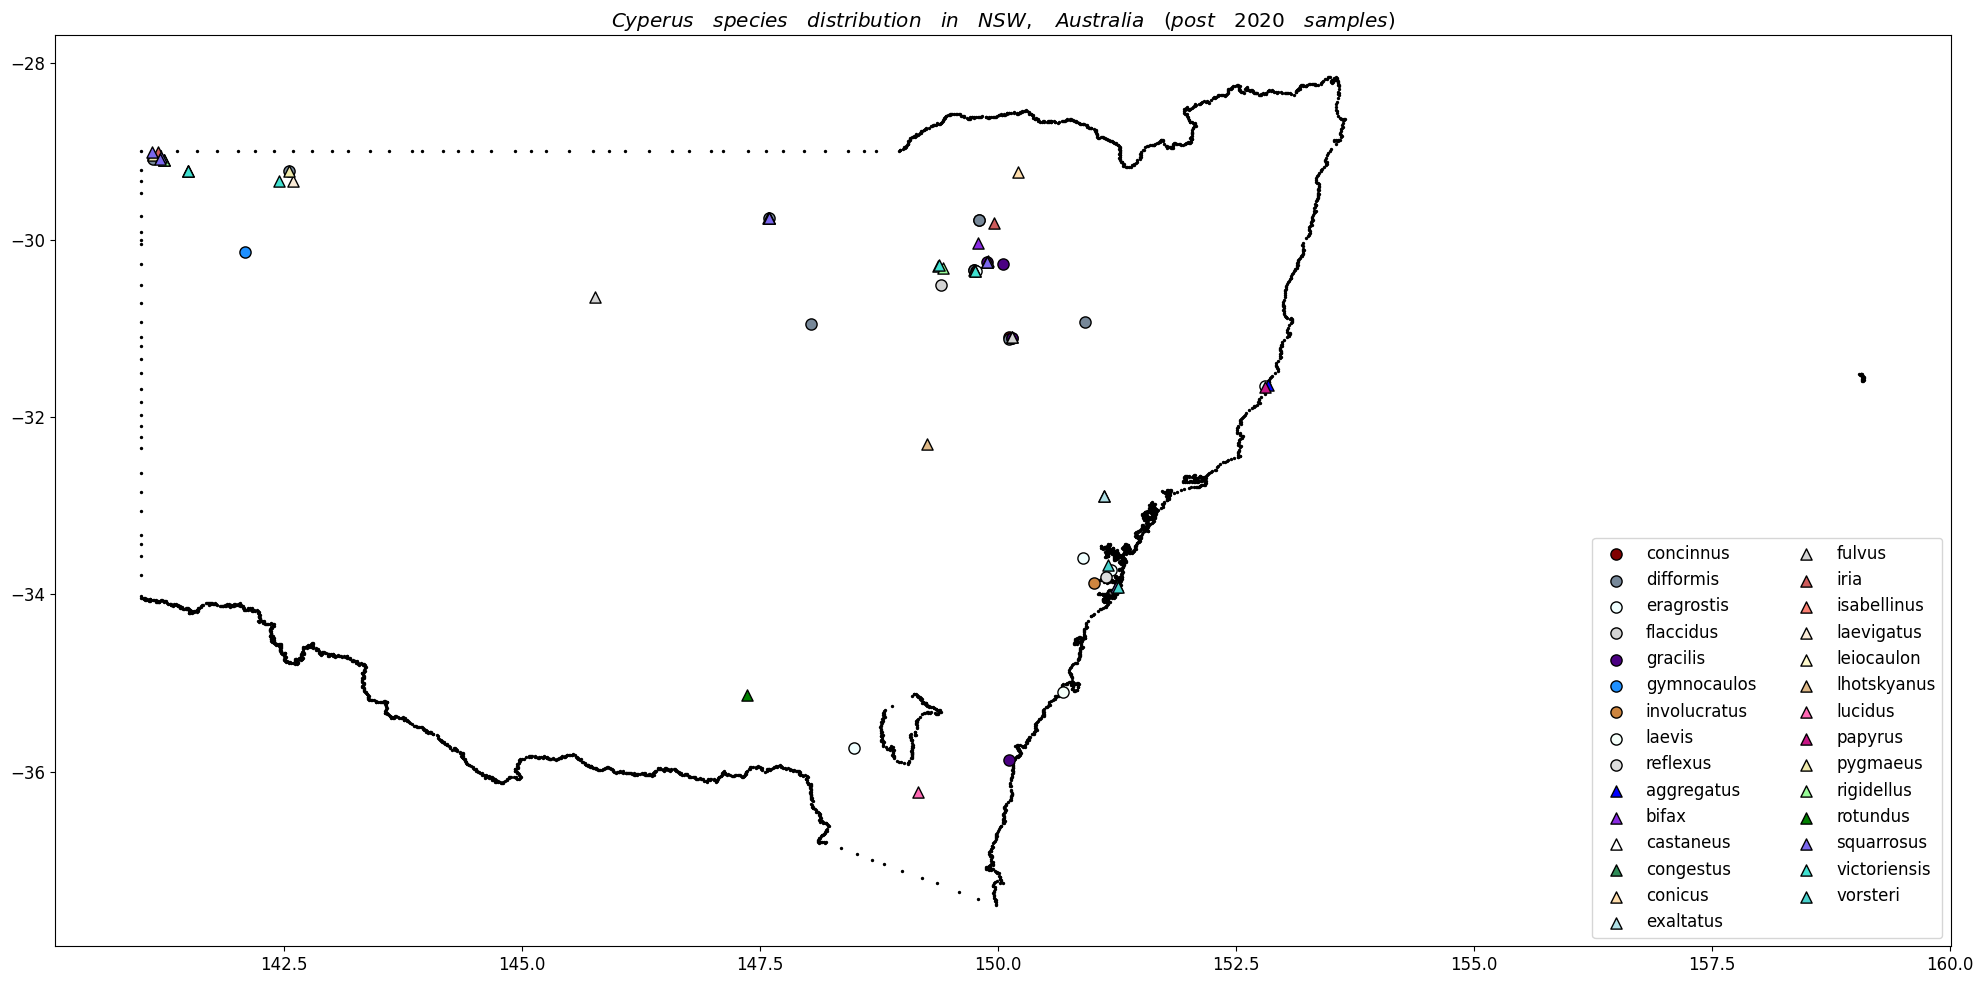

In [150]:
# samples post 2020??

fig, axes = plt.subplots()
fig.set_size_inches(20, 10)
plt.rcParams["font.size"] = 12

# borders
axes.scatter(COORDINATES_NSW[:, 0], COORDINATES_NSW[:, 1], s=2, color="black")

for (pathway, df) in cyperus_nsw.query("year>=2020").groupby("photosyntheticPathway"):
    for (species, _df) in df.groupby("specificEpithet"):
        axes.scatter(x=_df.decimalLongitude, y=_df.decimalLatitude,
                c=CYPERUS_SPECIES_COLOUR_LOOKUP.get(species), label=species, edgecolor="black", s=65,
                    marker=PHOTOSYNTHETIC_PATHWAY_MARKER_LOOKUP_TABLE.get(pathway))
axes.legend(ncols=2)
axes.set_title(r"$Cyperus\hspace{1}species\hspace{1}distribution\hspace{1}in\hspace{1}NSW,\hspace{1}Australia\hspace{1}(post\hspace{1}2020\hspace{1}samples)$")
plt.tight_layout()
# plt.show()
plt.savefig(fname=r"./cyperus-post-2020-nsw.jpeg", dpi=500, bbox_inches="tight")

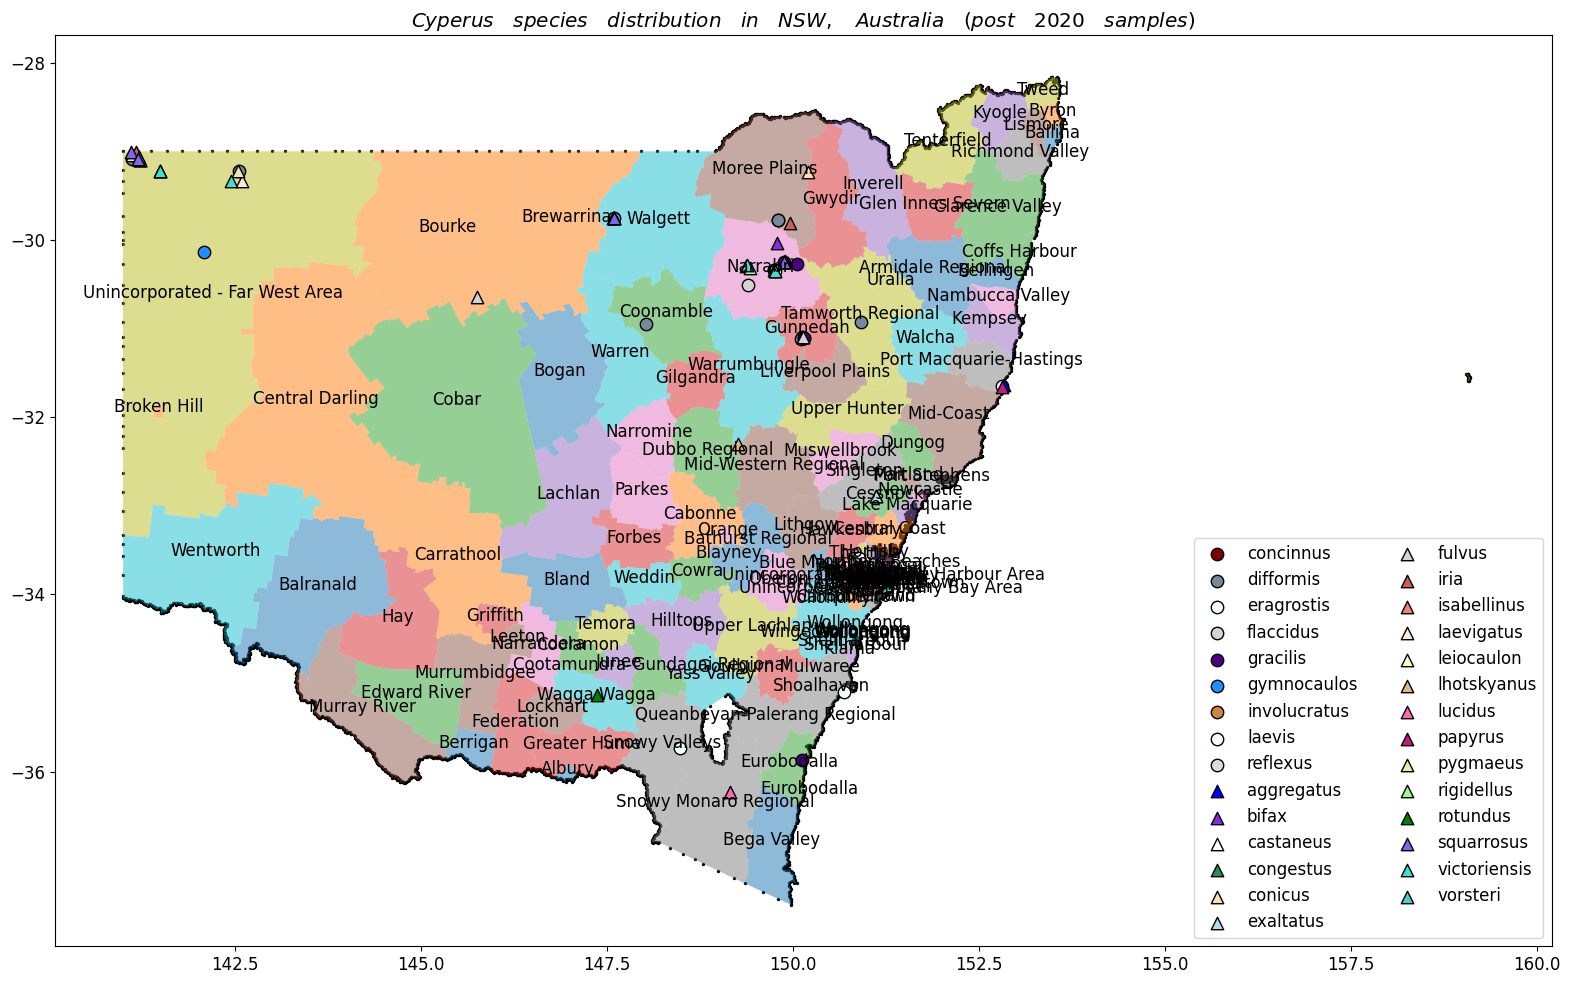

In [149]:
fig, axes = plt.subplots()
fig.set_size_inches(20, 10)
plt.rcParams["font.size"] = 12

# borders
axes.scatter(COORDINATES_NSW[:, 0], COORDINATES_NSW[:, 1], s=2, color="black")
nsw_lga.plot(ax=axes, column="ABB_NAME", alpha=0.5, linestyle="-")
nsw_lga.apply(lambda row: axes.annotate(text=row["ABB_NAME"], xy=row.geometry.centroid.coords[0],
                            ha='center') if row.geometry.centroid.coords[0][0] < 155 else None, axis=1)

for (pathway, df) in cyperus_nsw.query("year>=2020").groupby("photosyntheticPathway"):
    for (species, _df) in df.groupby("specificEpithet"):
        axes.scatter(x=_df.decimalLongitude, y=_df.decimalLatitude,
                c=CYPERUS_SPECIES_COLOUR_LOOKUP.get(species), label=species, edgecolor="black", s=80,
                    marker=PHOTOSYNTHETIC_PATHWAY_MARKER_LOOKUP_TABLE.get(pathway))
axes.legend(ncols=2, loc="lower right")
axes.set_title(r"$Cyperus\hspace{1}species\hspace{1}distribution\hspace{1}in\hspace{1}NSW,\hspace{1}Australia\hspace{1}(post\hspace{1}2020\hspace{1}samples)$")
plt.tight_layout()
# plt.show()
plt.savefig(fname=r"./cyperus-post-2020-nsw-lga.jpeg", dpi=500, bbox_inches="tight")